In [1]:
# Set environment variable to handle OpenMP runtime conflict
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

# Also set this for the current session
if os.name == 'nt':  # Windows
    try:
        import ctypes
        ctypes.CDLL('mkl_rt.dll')
    except:
        pass

In [30]:
import importlib
import ukko.survival
importlib.reload(ukko.survival)

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter, LogLogisticAFTFitter, KaplanMeierFitter

# Import ukko survival functions
from ukko.survival import plot_KM, plot_loglogistic_hazard, generate_survival_data_LL

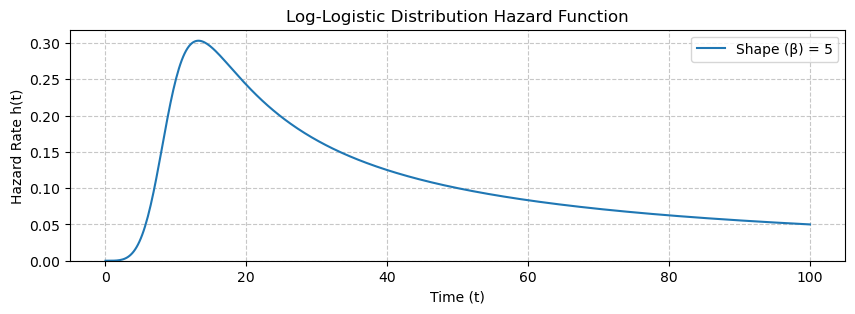


Log-Logistic AFT Survival Data Head:
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.496714  -0.138264   0.647689   1.523030  -0.234153  -0.234137   
1  -0.463418  -0.465730   0.241962  -1.913280  -1.724918  -0.562288   
2   1.465649  -0.225776   0.067528  -1.424748  -0.544383   0.110923   

   feature_6  feature_7  feature_8  feature_9  survival_time  event_observed  \
0   1.579213   0.767435  -0.469474   0.542560       4.659235               1   
1  -1.012831   0.314247  -0.908024  -1.412304      12.598915               0   
2  -1.150994   0.375698  -0.600639  -0.291694       4.569139               1   

   observed_time  
0       4.659235  
1      12.598915  
2       4.569139  

Actual censoring: 0.31


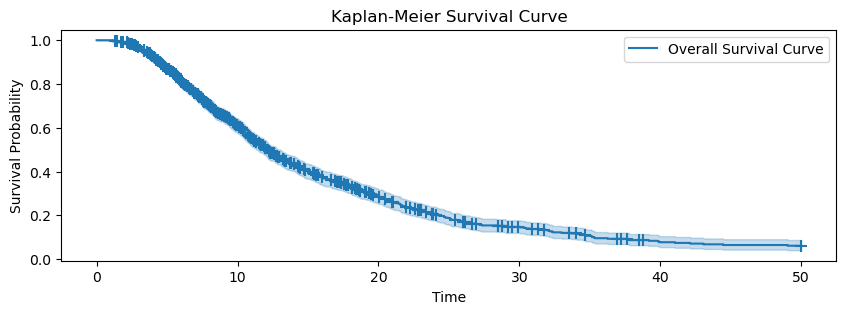


Cox PH Model Summary:


<lifelines.CoxPHFitter: fitted with 1000 total observations, 311 right-censored observations>
             duration col = 'observed_time'
                event col = 'event_observed'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 689
   partial log-likelihood = -3712.04
         time fit was run = 2025-05-30 17:55:13 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
feature_0  0.48      1.62      0.04            0.40            0.56                1.50                1.75
feature_1  1.05      2.87      0.05            0.96            1.14                2.62                3.14
feature_2  1.16      3.20      0.05            1.07            1.26                2.90                3.54
feature_3 -0.00      1.00      0.04           -0.08            0.07                0.93                1.08
feature_4  0.02      1.02      0.04           -0.06            0.09                0.94                1.10
feature_5 -0.05      0.95      0.04           -0.12            0.02                0.89                1.02
feature_6 -0.04      0.96      0.04           -0.12            0.03                0.89                1.03
feature_7  0.03      1.03      0.04           -0.04            0.10                0.96                1.11
feature_8  0.01      1.01      0.04           -0.07            0.08                0.93                1.09
feature_9  0.05      1.05      0.04           -0.03            0.12                0.97                1.13

           cmp to     z      p  -log2(p)
covariate                               
feature_0    0.00 11.90 <0.005    106.01
feature_1    0.00 22.75 <0.005    378.15
feature_2    0.00 23.14 <0.005    391.10
feature_3    0.00 -0.02   0.98      0.03
feature_4    0.00  0.45   0.65      0.62
feature_5    0.00 -1.37   0.17      2.56
feature_6    0.00 -1.15   0.25      2.00
feature_7    0.00  0.79   0.43      1.22
feature_8    0.00  0.19   0.85      0.24
feature_9    0.00  1.22   0.22      2.16
---
Concordance = 0.83
Partial AIC = 7444.08
log-likelihood ratio test = 834.71 on 10 df
-log2(p) of ll-ratio test = 571.87

['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']
covariate
feature_5    0.000000
feature_6    0.000000
feature_3    0.000000
feature_8    0.000000
feature_4    0.000000
feature_7    0.000000
feature_9    0.000000
feature_0   -0.178745
feature_1   -0.396981
feature_2   -0.428192
dtype: float64


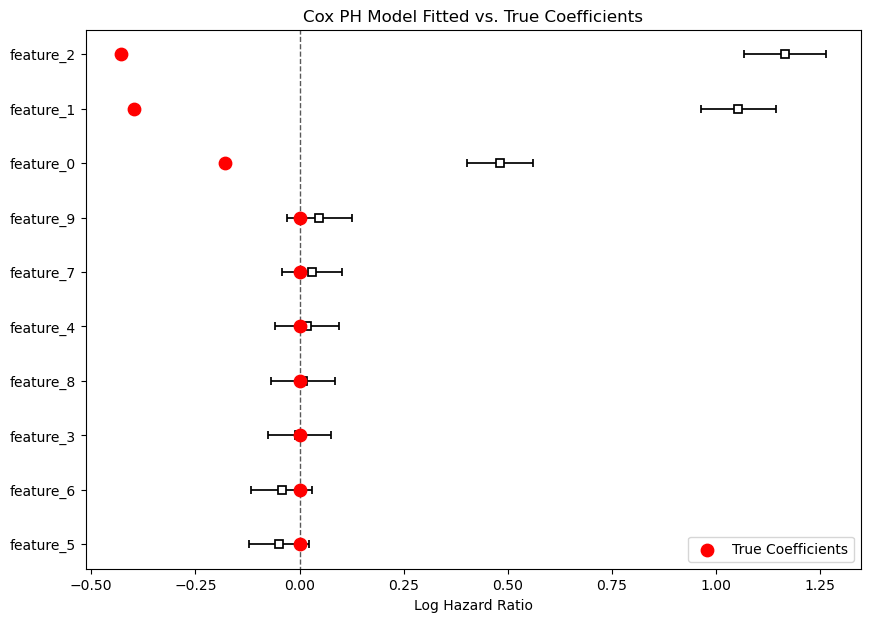


AFT Log-logistic Model Summary:


<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 311 right-censored observations>
             duration col = 'observed_time'
                event col = 'event_observed'
   number of observations = 1000
number of events observed = 689
           log-likelihood = -2100.03
         time fit was run = 2025-05-30 17:55:13 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                  
alpha_ feature_0 -0.16      0.85      0.01           -0.18           -0.13                0.83                0.88
       feature_1 -0.41      0.67      0.01           -0.43           -0.38                0.65                0.68
       feature_2 -0.44      0.65      0.01           -0.46           -0.41                0.63                0.66
       feature_3  0.01      1.01      0.01           -0.02            0.03                0.98                1.03
       feature_4 -0.01      0.99      0.01           -0.03            0.02                0.97                1.02
       feature_5  0.02      1.02      0.01           -0.01            0.04                0.99                1.04
       feature_6  0.01      1.01      0.01           -0.02            0.04                0.98                1.04
       feature_7 -0.01      0.99      0.01           -0.03            0.02                0.97                1.02
       feature_8  0.01      1.01      0.01           -0.02            0.04                0.98                1.04
       feature_9 -0.01      0.99      0.01           -0.03            0.02                0.97                1.02
       Intercept  2.40     11.05      0.01            2.38            2.43               10.76               11.35
beta_  Intercept  1.47      4.33      0.03            1.40            1.53                4.07                4.60

                  cmp to      z      p  -log2(p)
param  covariate                                
alpha_ feature_0    0.00 -11.64 <0.005    101.57
       feature_1    0.00 -30.22 <0.005    664.03
       feature_2    0.00 -30.95 <0.005    696.24
       feature_3    0.00   0.49   0.63      0.67
       feature_4    0.00  -0.38   0.70      0.51
       feature_5    0.00   1.14   0.26      1.97
       feature_6    0.00   0.72   0.47      1.08
       feature_7    0.00  -0.74   0.46      1.12
       feature_8    0.00   0.83   0.41      1.29
       feature_9    0.00  -0.37   0.71      0.50
       Intercept    0.00 175.13 <0.005       inf
beta_  Intercept    0.00  46.71 <0.005       inf
---
Concordance = 0.83
AIC = 4224.06
log-likelihood ratio test = 950.21 on 10 df
-log2(p) of ll-ratio test = 654.43

['feature_0: alpha_', 'feature_1: alpha_', 'feature_2: alpha_', 'feature_3: alpha_', 'feature_4: alpha_', 'feature_5: alpha_', 'feature_6: alpha_', 'feature_7: alpha_', 'feature_8: alpha_', 'feature_9: alpha_']
feature_2: alpha_   -0.428192
feature_1: alpha_   -0.396981
feature_0: alpha_   -0.178745
feature_7: alpha_    0.000000
feature_9: alpha_    0.000000
feature_4: alpha_    0.000000
feature_3: alpha_    0.000000
feature_6: alpha_    0.000000
feature_8: alpha_    0.000000
feature_5: alpha_    0.000000
Intercept: beta_          NaN
Intercept: alpha_         NaN
dtype: float64


<Figure size 1000x700 with 0 Axes>

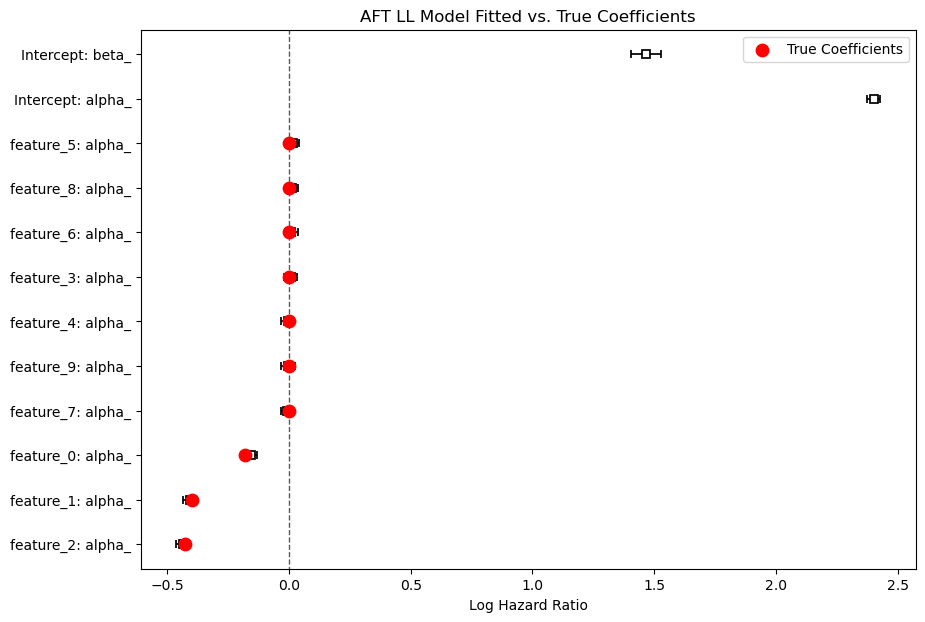

Highest Risk (Q1) size: 200
Q2 size: 202
Q3 size: 198
Q4 size: 200
Lowest Risk (Q5) size: 200


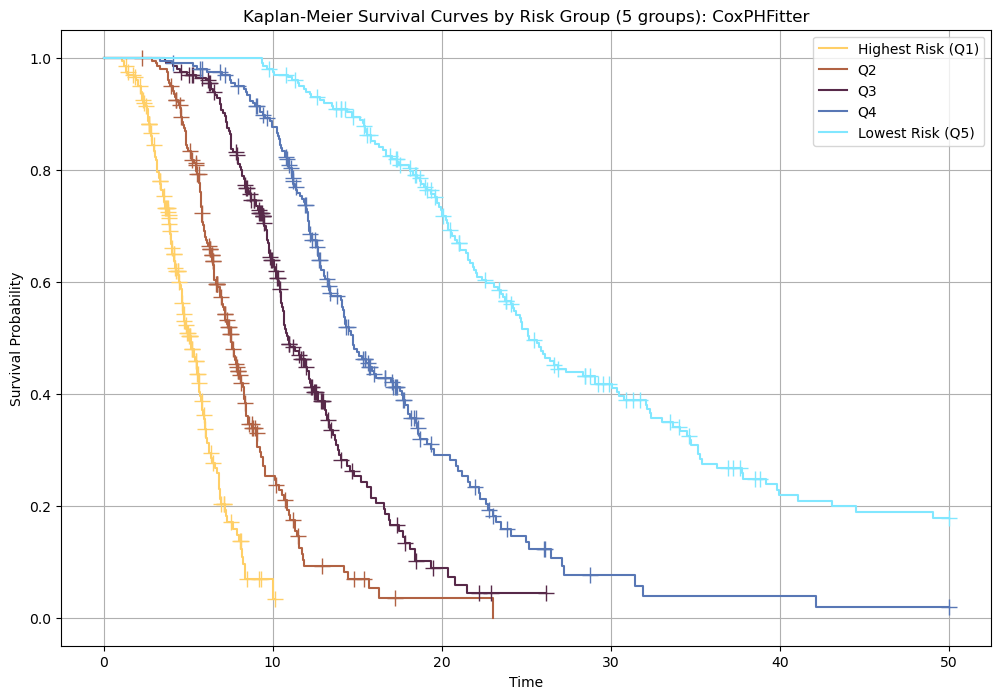

In [31]:
def generate_data(n_samples=1000, n_features=10, n_informative=3, 
                 shape=5, scale=10.0, censoring=0.3, random_seed=42):
    """Generate synthetic survival data with log-logistic distribution."""
    np.random.seed(random_seed)
    
    survival_data, true_coefficients = generate_survival_data_LL(
        n_samples, n_features, n_informative,
        shape, scale, censoring
    )
    feature_cols = [col for col in survival_data.columns if col.startswith('feature_')]
    cox_data = survival_data[feature_cols + ['observed_time', 'event_observed']]
    
    return survival_data, cox_data, true_coefficients, feature_cols

def fit_cox_model(cox_data):
    """Fit Cox proportional hazards model to survival data."""
    
    cph = CoxPHFitter()
    cph.fit(cox_data, duration_col='observed_time', event_col='event_observed')
    return cph

def plot_coefficient_comparison(model, true_coefficients, title):
    """Plot comparison between fitted and true coefficients."""
    plt.figure(figsize=(10, 7))
    ax = model.plot()
    
    
    #If model = coxph:
    feature_names = [f'feature_{i}' for i in range(len(true_coefficients))]
    model_params = model.params_.copy()  # Create a copy to avoid modifying original (for aft)
    xlabel = 'Log Hazard Ratio'

    if model._class_name == 'LogLogisticAFTFitter':
      # Update index for AFT model parameters
      new_index = [f"{cov}: {param}" if cov else param 
                  for param, cov in model.params_.index]
      model_params.index = new_index

      feature_names = [f'feature_{i}: alpha_' for i in range(len(true_coefficients))]
      #true_coef_series = pd.Series(true_coefficients, index=feature_names)
      #ordered_true_coef = true_coef_series.reindex(aftll_params.sort_values().index)

    print(feature_names)
    true_coef_series = pd.Series(true_coefficients, index=feature_names)
    ordered_true_coef = true_coef_series.reindex(model_params.sort_values().index)
    print(ordered_true_coef)

    ax.scatter(ordered_true_coef.values, range(len(ordered_true_coef)), 
              color='red', marker='o', s=80, zorder=5, label='True Coefficients')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.legend()
    plt.show()
    
    return ordered_true_coef

def fit_aft_model(cox_data):
    """Fit AFT log-logistic model and plot results."""
    aftll = LogLogisticAFTFitter()
    aftll.fit(cox_data, duration_col='observed_time', event_col='event_observed')
        
    # Plot comparison
    plt.figure(figsize=(10, 7))
    #ax = aftll.plot()
    
    return aftll #, ordered_true_coef

def stratify_and_plot(survival_data, model, feature_cols, n_groups=4):
    """Stratify patients into multiple risk groups and plot KM curves."""
    # Predict survival and stratify
    predicted_survival = model.predict_median(survival_data[feature_cols])
    survival_data['predicted_median_survival'] = predicted_survival
    
    # Calculate quantile cutoffs
    quantiles = np.linspace(0, 1, n_groups + 1)
    cutoffs = np.quantile(survival_data['predicted_median_survival'], quantiles)
    
    # Plot KM curves
    plt.figure(figsize=(12, 8))
    
    # Create color map for groups
    colors = plt.cm.managua(np.linspace(0, 1, n_groups))
    
    for i in range(n_groups):
        if i == 0:
            mask = survival_data['predicted_median_survival'] <= cutoffs[1]
            group_label = f'Highest Risk (Q1)'
        elif i == n_groups - 1:
            mask = survival_data['predicted_median_survival'] > cutoffs[-2]
            group_label = f'Lowest Risk (Q{n_groups})'
        else:
            mask = (survival_data['predicted_median_survival'] > cutoffs[i]) & \
                   (survival_data['predicted_median_survival'] <= cutoffs[i+1])
            group_label = f'Q{i+1}'
        
        group = survival_data[mask]
        
        kmf = KaplanMeierFitter()
        kmf.fit(durations=group['observed_time'],
                event_observed=group['event_observed'],
                label=group_label)
        kmf.plot_survival_function(show_censors=True, ci_show=False, color=colors[i])
        
        print(f"{group_label} size: {len(group)}")
    
    plt.title(f'Kaplan-Meier Survival Curves by Risk Group ({n_groups} groups): {model._class_name}')
    plt.xlabel('Time')
    plt.ylabel('Survival Probability')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return cutoffs

def main():
    # Generate synthetic data
    survival_data, cox_data, true_coefficients, feature_cols = generate_data()
    
    # Plot hazard function
    plot_loglogistic_hazard([5], scale=10.0, max_time=100)
    
    # Show data summary
    print("\nLog-Logistic AFT Survival Data Head:")
    print(survival_data.head(3))
    #print("\nDescriptive Statistics:")
    #print(survival_data['observed_time'].describe())
    print(f"\nActual censoring: {1 - survival_data['event_observed'].mean():.2f}")
    
    # Plot KM curve
    plot_KM(survival_data)
    
    # Fit and evaluate models
    cph = fit_cox_model(cox_data)
    print("\nCox PH Model Summary:")
    cph.print_summary()
    
    ordered_true_coef_cox = plot_coefficient_comparison(
        cph, true_coefficients, 
        'Cox PH Model Fitted vs. True Coefficients'
    )
    
    aftll = fit_aft_model(cox_data)
    print("\nAFT Log-logistic Model Summary:")
    aftll.print_summary()

    ordered_true_coef_aftll = plot_coefficient_comparison(
        aftll, true_coefficients, 
        'AFT LL Model Fitted vs. True Coefficients' 
    )
    
    # Stratify and plot risk groups
    cutoffs = stratify_and_plot(survival_data, cph, feature_cols, n_groups=5)

if __name__ == "__main__":
    main()